In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional

from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
number_of_samples = 1100

In [ ]:
data_attack = pd.read_csv('/content/drive/MyDrive/ddos_udp1/out-ddos.csv', nrows = number_of_samples)

In [ ]:
data_normal = pd.read_csv('/content/drive/MyDrive/ddos_udp1/out-normal.csv', nrows = number_of_samples)

In [ ]:
data_normal.describe()

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,udp.checksum.status,udp.dstport,udp.length,udp.port,udp.srcport,udp.stream,udp.time_delta,udp.time_relative,class
count,1100.000000,1100.0,1100.000000,1100.0,1100.000000,1100.0,1100.0,1100.000000,1100.0,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0
mean,325.819091,20.0,311.819091,0.0,0.918182,0.0,0.0,58.684545,17.0,2.0,19427.734545,291.819091,35472.213636,35472.213636,58.629091,2.443341,70.501582,0.0
std,350.233281,0.0,350.233281,0.0,0.274212,0.0,0.0,60.308967,0.0,0.0,26933.546210,350.233281,24246.799993,24246.799993,48.058698,12.359219,148.081047,0.0
min,67.000000,20.0,53.000000,0.0,0.000000,0.0,0.0,1.000000,17.0,2.0,53.000000,33.000000,53.000000,53.000000,0.000000,0.000000,0.000000,0.0
25%,81.000000,20.0,67.000000,0.0,1.000000,0.0,0.0,1.000000,17.0,2.0,443.000000,47.000000,1900.000000,1900.000000,5.750000,0.000142,0.107326,0.0
50%,167.000000,20.0,153.000000,0.0,1.000000,0.0,0.0,56.000000,17.0,2.0,1900.000000,133.000000,42283.000000,42283.000000,53.000000,0.002200,0.348002,0.0
75%,372.000000,20.0,358.000000,0.0,1.000000,0.0,0.0,128.000000,17.0,2.0,54114.000000,338.000000,55495.000000,55495.000000,104.000000,0.281669,30.451387,0.0
max,1292.000000,20.0,1278.000000,0.0,1.000000,0.0,0.0,255.000000,17.0,2.0,65271.000000,1258.000000,65271.000000,65271.000000,151.000000,186.729527,580.285742,0.0


In [ ]:
data_attack.describe()

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,udp.checksum.status,udp.dstport,udp.length,udp.port,udp.srcport,udp.stream,udp.time_delta,udp.time_relative,class
count,1100.000000,1100.0,1100.000000,1100.0,1100.000000,1100.0,1100.0,1100.000000,1100.0,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0
mean,353.232727,20.0,339.232727,0.0,0.808182,0.0,0.0,55.506364,17.0,2.0,20358.400000,319.232727,31704.648182,31704.648182,39.936364,3.435187,208.510655,1.0
std,315.001443,0.0,315.001443,0.0,0.393910,0.0,0.0,59.163681,0.0,0.0,26332.542054,315.001443,23618.487201,23618.487201,41.015339,24.734338,296.842425,0.0
min,67.000000,20.0,53.000000,0.0,0.000000,0.0,0.0,1.000000,17.0,2.0,53.000000,33.000000,53.000000,53.000000,0.000000,0.000000,0.000000,1.0
25%,176.750000,20.0,162.750000,0.0,1.000000,0.0,0.0,1.000000,17.0,2.0,1900.000000,142.750000,1900.000000,1900.000000,7.000000,0.000142,0.132148,1.0
50%,342.000000,20.0,328.000000,0.0,1.000000,0.0,0.0,56.000000,17.0,2.0,1900.000000,308.000000,33518.000000,33518.000000,13.000000,0.004502,2.024812,1.0
75%,376.000000,20.0,362.000000,0.0,1.000000,0.0,0.0,64.000000,17.0,2.0,52300.000000,342.000000,52300.000000,52300.000000,76.000000,1.012825,390.041642,1.0
max,1292.000000,20.0,1278.000000,0.0,1.000000,0.0,0.0,255.000000,17.0,2.0,65472.000000,1258.000000,65472.000000,65472.000000,135.000000,720.228325,929.739175,1.0


In [ ]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frame.len            1100 non-null   int64  
 1   ip.hdr_len           1100 non-null   int64  
 2   ip.len               1100 non-null   int64  
 3   ip.flags.rb          1100 non-null   int64  
 4   ip.flags.df          1100 non-null   int64  
 5   ip.flags.mf          1100 non-null   int64  
 6   ip.frag_offset       1100 non-null   int64  
 7   ip.ttl               1100 non-null   int64  
 8   ip.proto             1100 non-null   int64  
 9   udp.checksum.status  1100 non-null   int64  
 10  udp.dstport          1100 non-null   int64  
 11  udp.length           1100 non-null   int64  
 12  udp.port             1100 non-null   int64  
 13  udp.srcport          1100 non-null   int64  
 14  udp.stream           1100 non-null   int64  
 15  udp.time_delta       1100 non-null   f

In [ ]:
data_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frame.len            1100 non-null   int64  
 1   ip.hdr_len           1100 non-null   int64  
 2   ip.len               1100 non-null   int64  
 3   ip.flags.rb          1100 non-null   int64  
 4   ip.flags.df          1100 non-null   int64  
 5   ip.flags.mf          1100 non-null   int64  
 6   ip.frag_offset       1100 non-null   int64  
 7   ip.ttl               1100 non-null   int64  
 8   ip.proto             1100 non-null   int64  
 9   udp.checksum.status  1100 non-null   int64  
 10  udp.dstport          1100 non-null   int64  
 11  udp.length           1100 non-null   int64  
 12  udp.port             1100 non-null   int64  
 13  udp.srcport          1100 non-null   int64  
 14  udp.stream           1100 non-null   int64  
 15  udp.time_delta       1100 non-null   f

In [ ]:
data_attack.corr()

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,udp.checksum.status,udp.dstport,udp.length,udp.port,udp.srcport,udp.stream,udp.time_delta,udp.time_relative,class
frame.len,1.000000,NaN,1.000000,NaN,0.272135,NaN,NaN,0.064789,NaN,NaN,0.143537,1.000000,-0.107567,-0.107567,0.122074,-0.033167,-0.088022,NaN
ip.hdr_len,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.len,1.000000,NaN,1.000000,NaN,0.272135,NaN,NaN,0.064789,NaN,NaN,0.143537,1.000000,-0.107567,-0.107567,0.122074,-0.033167,-0.088022,NaN
ip.flags.rb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.flags.df,0.272135,NaN,0.272135,NaN,1.000000,NaN,NaN,0.264866,NaN,NaN,0.347244,0.272135,-0.409375,-0.409375,0.122471,-0.090948,-0.084506,NaN
ip.flags.mf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.frag_offset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.ttl,0.064789,NaN,0.064789,NaN,0.264866,NaN,NaN,1.000000,NaN,NaN,0.051794,0.064789,-0.015355,-0.015355,0.315076,0.003323,-0.440283,NaN
ip.proto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
udp.checksum.status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_normal.corr()

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,udp.checksum.status,udp.dstport,udp.length,udp.port,udp.srcport,udp.stream,udp.time_delta,udp.time_relative,class
frame.len,1.000000,NaN,1.000000,NaN,0.123801,NaN,NaN,0.037714,NaN,NaN,0.171334,1.000000,-0.119436,-0.119436,0.039262,-0.022079,-0.027870,NaN
ip.hdr_len,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.len,1.000000,NaN,1.000000,NaN,0.123801,NaN,NaN,0.037714,NaN,NaN,0.171334,1.000000,-0.119436,-0.119436,0.039262,-0.022079,-0.027870,NaN
ip.flags.rb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.flags.df,0.123801,NaN,0.123801,NaN,1.000000,NaN,NaN,0.175057,NaN,NaN,0.197755,0.123801,-0.292568,-0.292568,0.077168,-0.095792,-0.065806,NaN
ip.flags.mf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.frag_offset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip.ttl,0.037714,NaN,0.037714,NaN,0.175057,NaN,NaN,1.000000,NaN,NaN,-0.013391,0.037714,0.047065,0.047065,0.117239,0.060979,-0.140934,NaN
ip.proto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
udp.checksum.status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_normal.columns

Index(['frame.len', 'ip.hdr_len', 'ip.len', 'ip.flags.rb', 'ip.flags.df',
       'ip.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto',
       'udp.checksum.status', 'udp.dstport', 'udp.length', 'udp.port',
       'udp.srcport', 'udp.stream', 'udp.time_delta', 'udp.time_relative',
       'class'],
      dtype='object')

In [ ]:
data_normal.columns=[ 'frame.len', 'ip.hdr_len', 'ip.len', 'ip.flags.rb', 'ip.flags.df',
       'ip.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto',
       'udp.checksum.status', 'udp.dstport', 'udp.length', 'udp.port',
       'udp.srcport', 'udp.stream', 'udp.time_delta', 'udp.time_relative','class']
data_attack.columns=[ 'frame.len', 'ip.hdr_len', 'ip.len', 'ip.flags.rb', 'ip.flags.df',
       'ip.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto',
       'udp.checksum.status', 'udp.dstport', 'udp.length', 'udp.port',
       'udp.srcport', 'udp.stream', 'udp.time_delta', 'udp.time_relative','class']

In [ ]:
features=['frame.len','ip.len', 'ip.flags.rb', 'ip.flags.df',
       'ip.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto',
       'udp.checksum.status', 'udp.dstport','udp.port',
       'udp.stream', 'udp.time_delta', 'udp.time_relative']

In [ ]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x = min_max_scaler.fit_transform(X)

x

array([[9.14285714e-02, 9.14285714e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.24489796e-01, 2.24489796e-01, 0.00000000e+00, ...,
        6.62251656e-03, 0.00000000e+00, 0.00000000e+00],
       [9.14285714e-02, 9.14285714e-02, 0.00000000e+00, ...,
        0.00000000e+00, 4.17247961e-03, 3.23223769e-03],
       ...,
       [6.44897959e-02, 6.44897959e-02, 0.00000000e+00, ...,
        8.87417219e-01, 5.03493111e-05, 3.90034119e-05],
       [5.71428571e-03, 5.71428571e-03, 0.00000000e+00, ...,
        8.94039735e-01, 0.00000000e+00, 0.00000000e+00],
       [9.22448980e-02, 9.22448980e-02, 0.00000000e+00, ...,
        8.94039735e-01, 5.52033274e-05, 4.27636063e-05]])

0


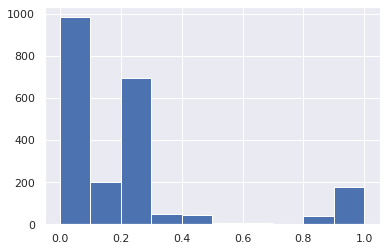

1


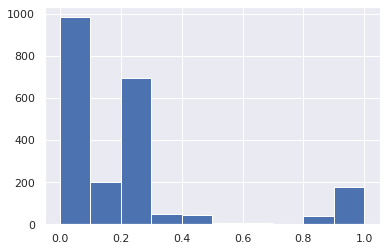

2


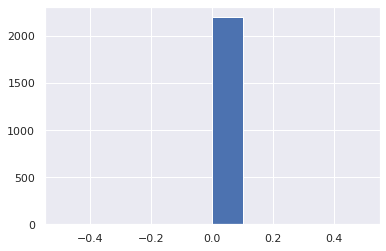

3


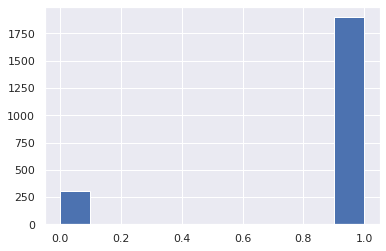

4


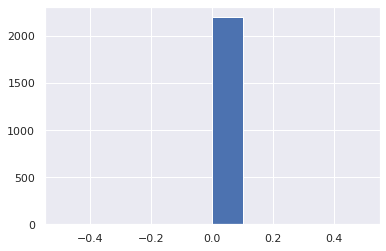

5


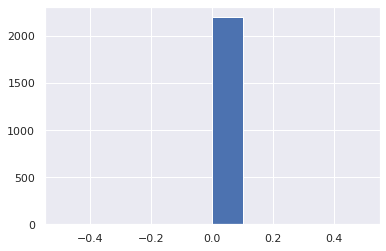

6


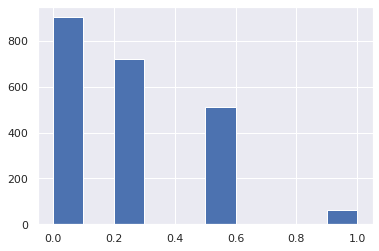

7


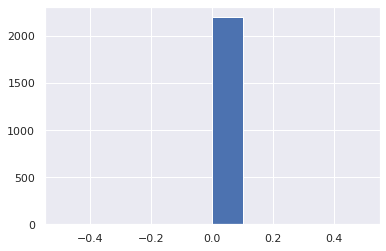

8


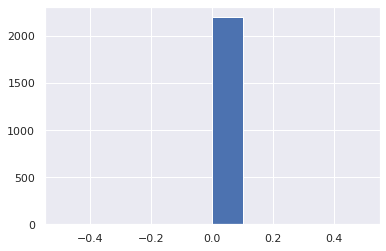

9


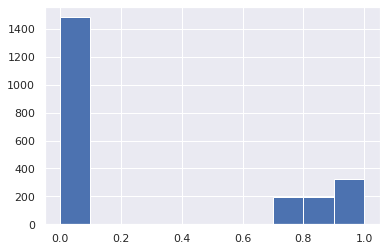

10


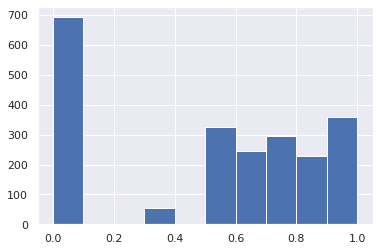

11


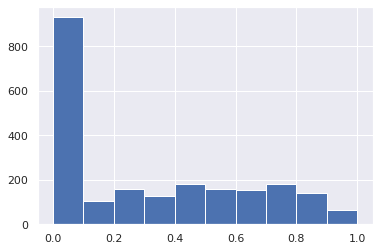

12


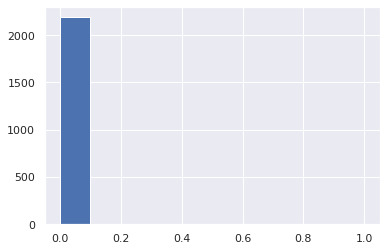

13


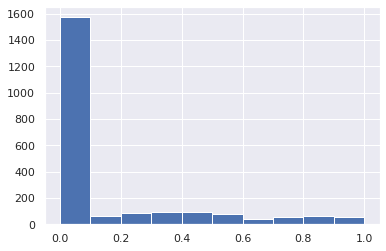

In [ ]:
# visualize a minmax scaler transform of the sonar dataset
from pandas import DataFrame
from matplotlib import pyplot
# convert the array back to a dataframe
dataset = DataFrame(x)
# summarize
# histograms of the variables

for i in range(len(dataset.columns)):
  print(i)
  dataset[i].hist()
  pyplot.show()

In [ ]:
for i in range(0,len(Y)):
  if Y[i] ==0:
    Y[i]=0
  else:
    Y[i]=1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3)

In [ ]:
x_l=X_train.tolist()

In [ ]:
y_l=Y_train.tolist()

In [ ]:
x_a=np.array(x_l)

In [ ]:
y_a=np.array(y_l)

In [ ]:
xt_l=X_test.tolist()

In [ ]:
yt_l=Y_test.tolist()

In [ ]:
xt_a=np.array(xt_l)

In [ ]:
yt_a=np.array(yt_l)

In [ ]:
def create_baseline():
    model = Sequential()
    model.add(LSTM(8, activation='relu', return_sequences=True, input_shape=(14, 1)))
    model.add(LSTM(8, activation='relu'))
    
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
    
    return model

In [ ]:
model = create_baseline()

In [ ]:
model.fit(x_a,y_a, epochs=500)

Epoch 1/500
49/49 [==============================] - 4s 11ms/step - loss: 0.4199 - accuracy: 0.5019
Epoch 2/500
49/49 [==============================] - 1s 11ms/step - loss: 0.2580 - accuracy: 0.4994
Epoch 3/500
49/49 [==============================] - 1s 11ms/step - loss: 0.2516 - accuracy: 0.4994
Epoch 4/500
49/49 [==============================] - 1s 11ms/step - loss: 0.2511 - accuracy: 0.5156
Epoch 5/500
49/49 [==============================] - 1s 11ms/step - loss: 0.2505 - accuracy: 0.5052
Epoch 6/500
49/49 [==============================] - 1s 11ms/step - loss: 0.2498 - accuracy: 0.5091
Epoch 7/500
49/49 [==============================] - 1s 11ms/step - loss: 0.2500 - accuracy: 0.5026
Epoch 8/500
49/49 [==============================] - 1s 12ms/step - loss: 0.2499 - accuracy: 0.5039
Epoch 9/500
49/49 [==============================] - 1s 12ms/step - loss: 0.2498 - accuracy: 0.5227
Epoch 10/500
49/49 [==============================] - 1s 11ms/step - loss: 0.2491 - accuracy: 0.5227

In [ ]:
test_loss,test_accuracy=model.evaluate(xt_a,yt_a)

21/21 [==============================] - 0s 4ms/step - loss: 0.1663 - accuracy: 0.7303
